In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve , auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/MAS/Datasets/indian_liver_patient.csv")
df = pd.DataFrame(data)

In [3]:
df.shape

(583, 11)

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

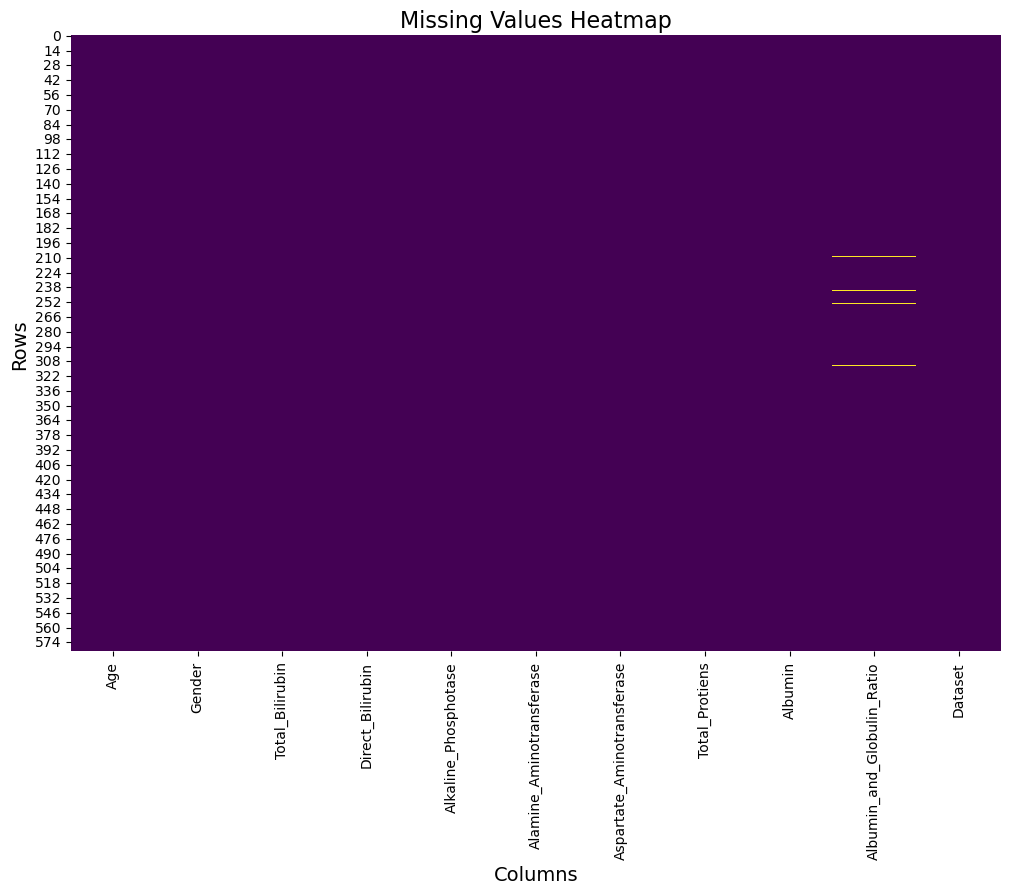

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Rows', fontsize=14)
plt.show()

In [8]:
labenc =LabelEncoder()
df['Gender']=labenc.fit_transform(df['Gender'])

In [9]:
df['Gender'].value_counts()

Gender
1    441
0    142
Name: count, dtype: int64

In [10]:
df.fillna(df.mean(),inplace=True)

In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

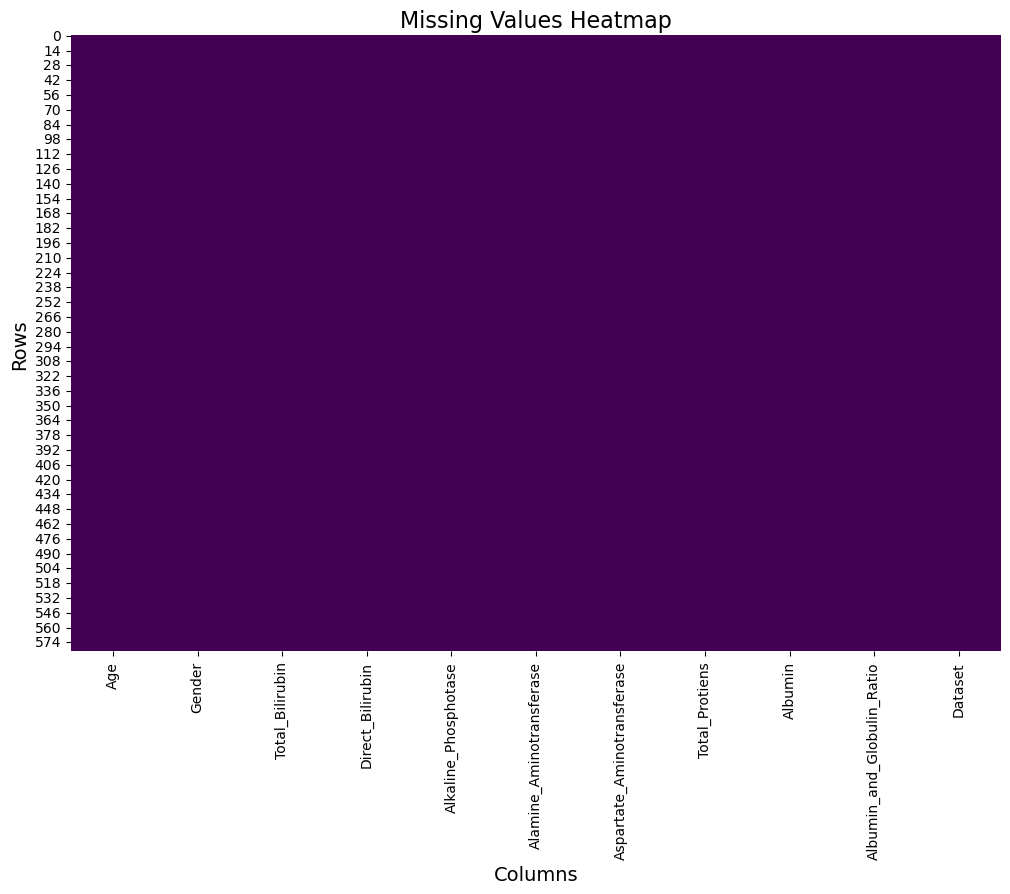

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Rows', fontsize=14)
plt.show()

In [13]:
dupli=df.duplicated().sum()
dupli

13

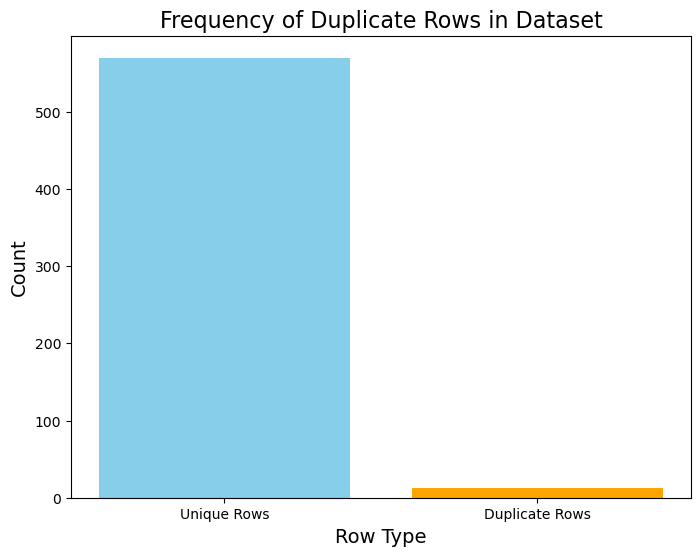

In [14]:
# Plotting duplicates
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicate Rows'], [len(df) - dupli, dupli], color=['skyblue', 'orange'])
plt.title('Frequency of Duplicate Rows in Dataset', fontsize=16)
plt.xlabel('Row Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [15]:
df_cleaned=df.drop_duplicates(inplace=True)
dup=df.duplicated().sum()
dup

0

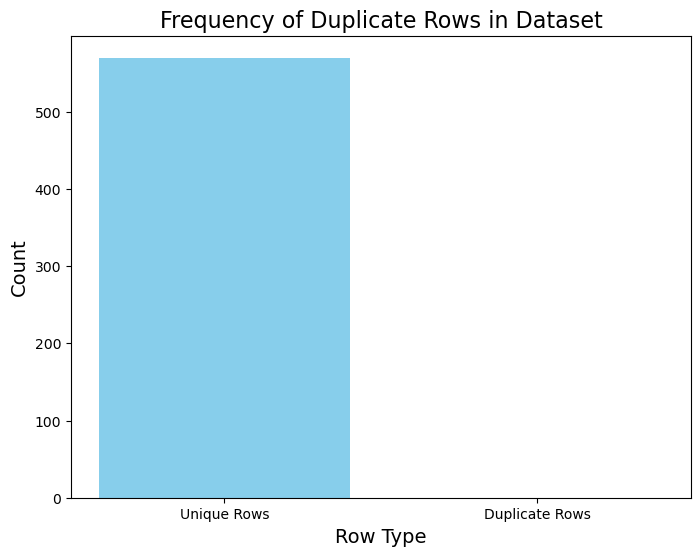

In [16]:
# Plotting duplicates
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicate Rows'], [len(df) - dup, dup], color=['skyblue', 'orange'])
plt.title('Frequency of Duplicate Rows in Dataset', fontsize=16)
plt.xlabel('Row Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [17]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,0.754386,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.947997,1.287719
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


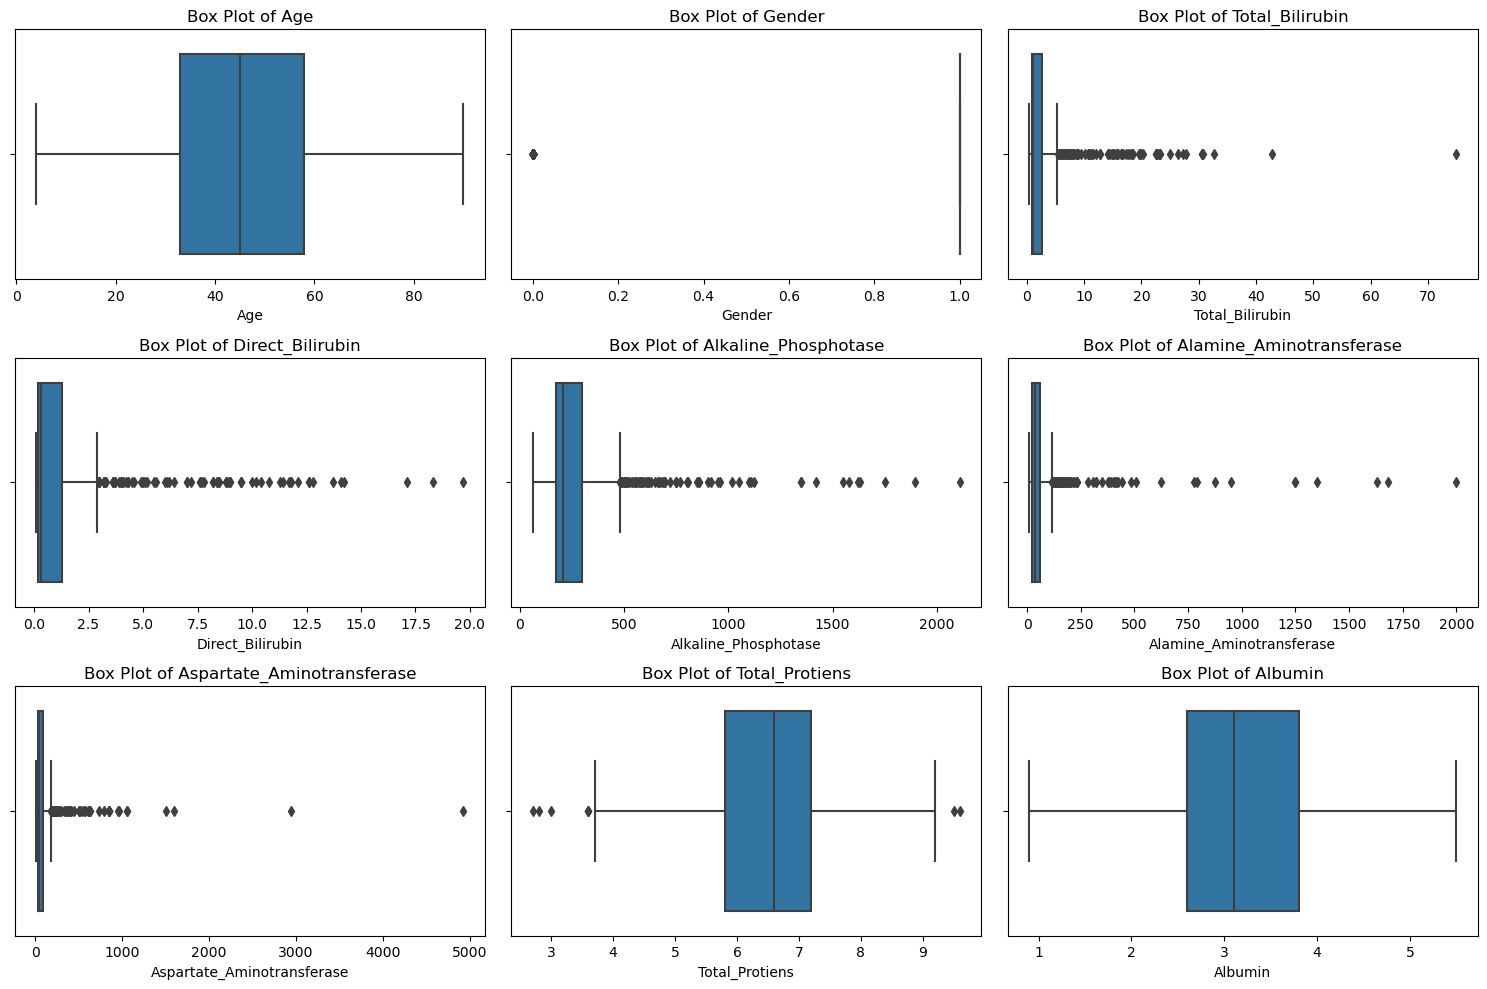

In [18]:

# Creating box plots for the selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [19]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

df_cleaned = remove_outliers_iqr(df)

In [20]:
df_cleaned.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,279.000000,279.0,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,45.354839,1.0,1.293190,0.493548,211.774194,35.103943,43.989247,6.487097,3.237276,0.989549,1.372760
std,16.785986,0.0,0.866725,0.497506,68.657915,17.449618,29.847151,1.013601,0.752340,0.273467,0.484408
min,4.000000,1.0,0.400000,0.100000,75.000000,10.000000,11.000000,3.700000,1.400000,0.390000,1.000000
25%,33.000000,1.0,0.700000,0.200000,169.500000,22.000000,24.000000,5.900000,2.700000,0.800000,1.000000
50%,46.000000,1.0,0.900000,0.200000,196.000000,30.000000,34.000000,6.500000,3.200000,1.000000,1.000000
75%,58.000000,1.0,1.600000,0.600000,238.500000,45.000000,54.000000,7.200000,3.900000,1.190000,2.000000
max,90.000000,1.0,5.300000,2.900000,480.000000,97.000000,178.000000,8.700000,5.500000,1.700000,2.000000


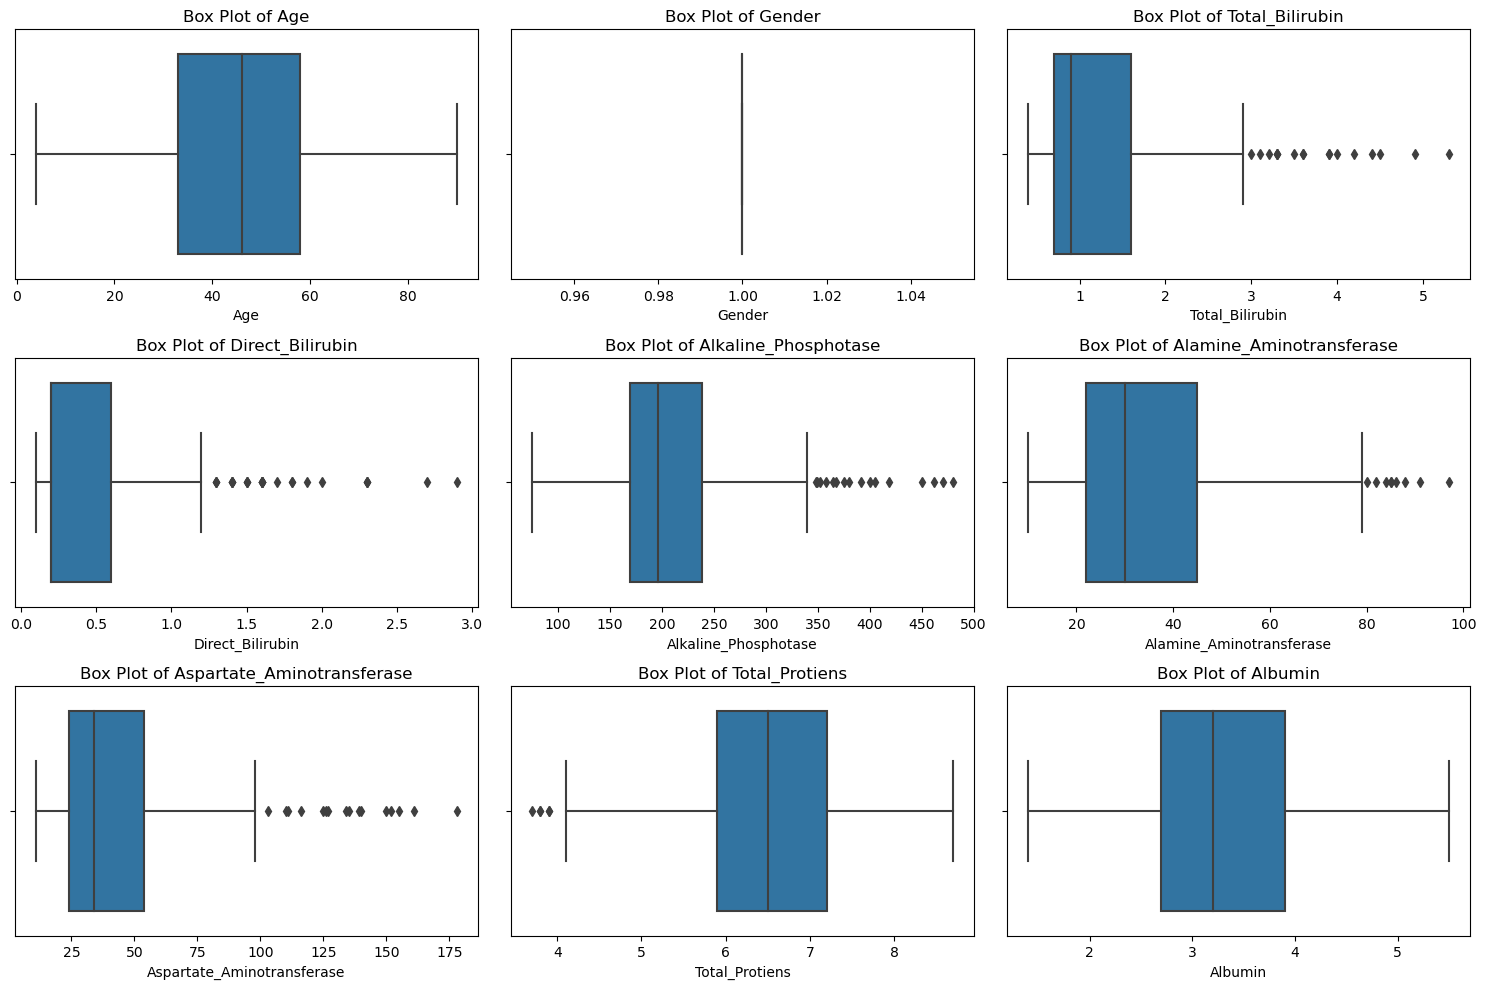

In [21]:

# Creating box plots for the selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df_cleaned.columns[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [22]:
data = {
    'With': [65.0, 73.255814],
    'Without': [35.0, 26.744186]
}

# Index represents the gender: 0 for female, 1 for male
index = ['Female', 'Male']

# Creating the DataFrame
percentage_df = pd.DataFrame(data, index=index)

# Print the percentages
print("Percentage of Males and Females with/without Liver Disease:")
print(percentage_df)


Percentage of Males and Females with/without Liver Disease:
             With    Without
Female  65.000000  35.000000
Male    73.255814  26.744186


In [23]:
percentage_df = pd.crosstab(df['Gender'], df['Dataset'], normalize='index') * 100


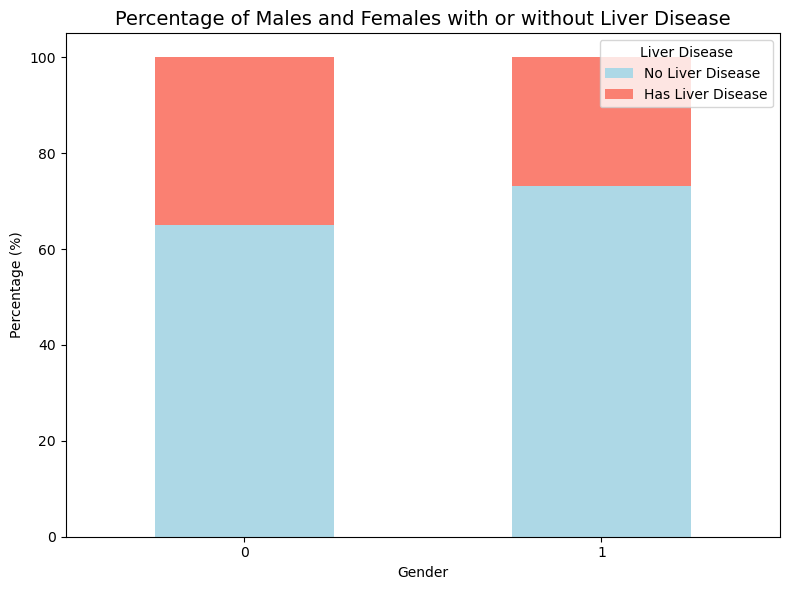

In [24]:
# Plotting
plt.figure(figsize=(8, 6))
percentage_df.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())

# Adding labels and title
plt.title('Percentage of Males and Females with or without Liver Disease', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.legend(['No Liver Disease', 'Has Liver Disease'], title="Liver Disease", loc='upper right')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
# Print the percentages
print("Percentage of Males and Females with/without Liver Disease:")
print(percentage_df)


Percentage of Males and Females with/without Liver Disease:
Dataset          1          2
Gender                       
0        65.000000  35.000000
1        73.255814  26.744186


In [26]:
data = {
    'With': [65.000000 , 73.255814],
    'Without': [35.000000 , 26.744186]
}

# Index represents the gender: 0 for female, 1 for male
index = ['Male', 'Female']

# Creating the DataFrame
percentage_df = pd.DataFrame(data, index=index)

# Print the percentages
print("Percentage of Males and Females with/without Liver Disease:")
print(percentage_df)

Percentage of Males and Females with/without Liver Disease:
             With    Without
Male    65.000000  35.000000
Female  73.255814  26.744186


In [27]:
from collections import Counter
liver_count = Counter(df['Dataset'])
liver_count

Counter({1: 406, 2: 164})

In [28]:
X=df.drop(['Dataset'],axis=1)
y=df['Dataset']

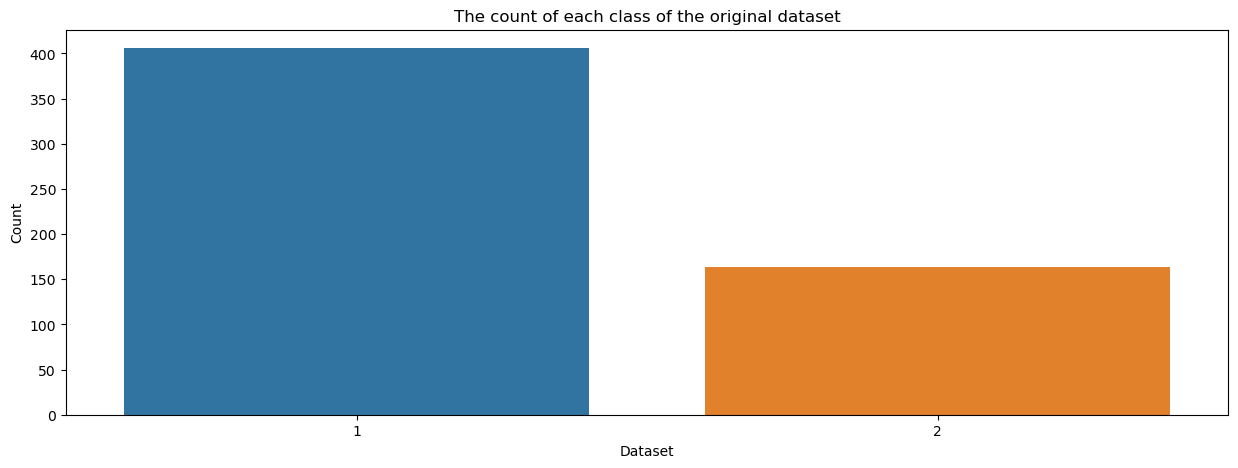

In [29]:
counting = y.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=counting.index, y=counting)
plt.ylabel("Count")
plt.title("The count of each class of the original dataset")
plt.show()

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled , y_resampled = sm.fit_resample(X,y)

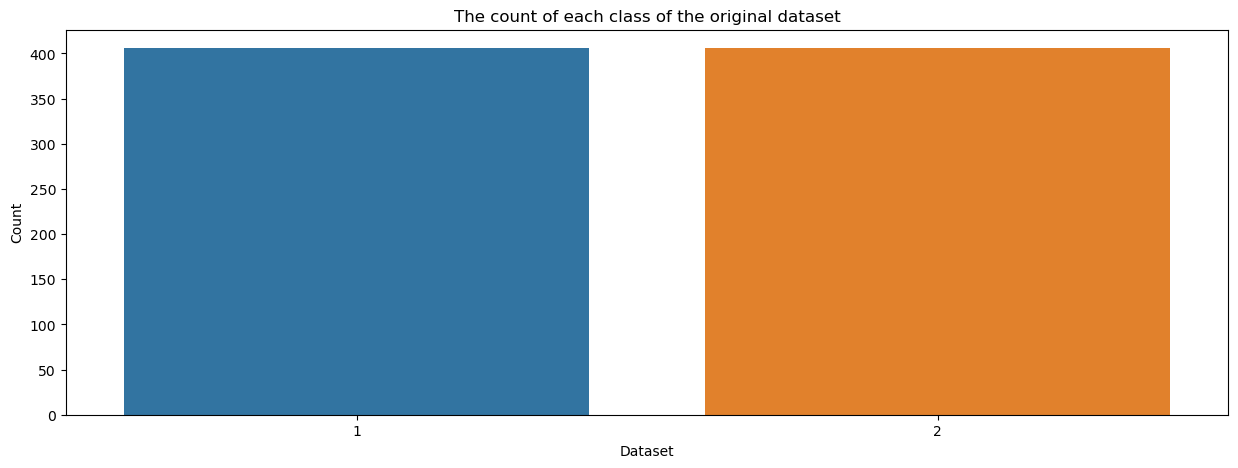

In [31]:
counting = y_resampled.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=counting.index, y=counting)
plt.ylabel("Count")
plt.title("The count of each class of the original dataset")
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_resampled)

In [33]:
from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Check the shape of X_scaled and assign appropriate column names
# Use X_poly.shape[1] to match the number of features
column_names = [f'feature_{i}' for i in range(X_scaled.shape[1])]
X_scaled_df = pd.DataFrame(X_scaled, columns=column_names)


In [34]:
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,812.0,-2.187632e-16,1.000616,-2.410432,-0.762692,0.061178,0.824020,2.837924
feature_1,812.0,0.000000e+00,1.000616,-1.465362,-1.465362,0.682425,0.682425,0.682425
feature_2,812.0,1.662600e-16,1.000616,-0.416279,-0.347871,-0.323022,-0.155161,13.497563
feature_3,812.0,-1.798233e-15,1.000616,-0.430090,-0.389057,-0.360733,-0.142860,7.612359
feature_4,812.0,1.137568e-16,1.000616,-0.950111,-0.447742,-0.322149,0.061605,8.571642
feature_5,812.0,8.750526e-18,1.000616,-0.357658,-0.286192,-0.227720,-0.084788,12.571191
feature_6,812.0,0.000000e+00,1.000616,-0.313750,-0.260952,-0.212215,-0.086310,19.664415
feature_7,812.0,-4.156500e-17,1.000616,-3.687931,-0.632655,0.075337,0.654301,2.970158
feature_8,812.0,2.310139e-15,1.000616,-3.037877,-0.679656,-0.024595,0.794696,2.988688
feature_9,812.0,-2.388894e-15,1.000616,-2.271040,-0.591439,0.080401,0.501579,6.126963


In [35]:
X_scaled_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54
0,1.312239,-1.465362,-0.360325,-0.430090,-0.373317,-0.318677,-0.281259,0.268325,0.106418,-0.255519,...,-0.108466,-0.326463,-0.311699,-0.284947,-0.272452,-0.297155,-0.298170,0.104830,-0.135265,-0.211643
1,1.129157,0.682425,1.542104,1.785687,2.008284,-0.006825,0.051778,0.943783,-0.024595,-0.792991,...,-0.089812,0.064570,0.000838,-0.089022,0.115683,0.082106,-0.024296,0.305255,-0.374171,-0.597322
2,1.129157,0.682425,0.870659,1.211226,1.036107,-0.032813,-0.078187,0.461313,0.106418,-0.289111,...,-0.096892,0.001364,-0.013144,-0.053118,-0.053771,-0.057024,-0.088168,0.189626,-0.089161,-0.232785
3,0.885048,0.682425,-0.304371,-0.306991,-0.396575,-0.331670,-0.273136,0.268325,0.237430,0.080401,...,-0.108490,-0.340789,-0.322391,-0.287325,-0.264041,-0.284639,-0.280164,0.192195,0.149745,0.063842
4,1.739431,0.682425,0.236516,0.349535,-0.336104,-0.247211,-0.114740,0.750795,-1.072693,-1.935120,...,-0.104483,-0.233445,-0.287025,-0.306347,-0.081786,-0.177526,-0.263106,-0.527280,-1.476492,-1.499374


In [36]:
X_scaled_df.shape

(812, 55)

In [37]:
X ,y = X_scaled_df,y_resampled
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
print("Length of X train:", len(X_train))
print("Length of X test:", len(X_test))
print("Length of y train:", len(y_train))
print("Length of y test:", len(y_test))

Length of X train: 568
Length of X test: 244
Length of y train: 568
Length of y test: 244


Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.7377049180327869
Classification Report:
              precision    recall  f1-score   support

           1     0.9000    0.5250    0.6632       120
           2     0.6724    0.9435    0.7852       124

    accuracy                         0.7377       244
   macro avg     0.7862    0.7343    0.7242       244
weighted avg     0.7843    0.7377    0.7252       244



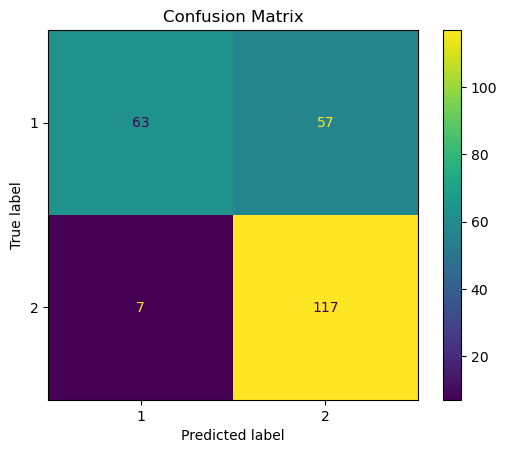

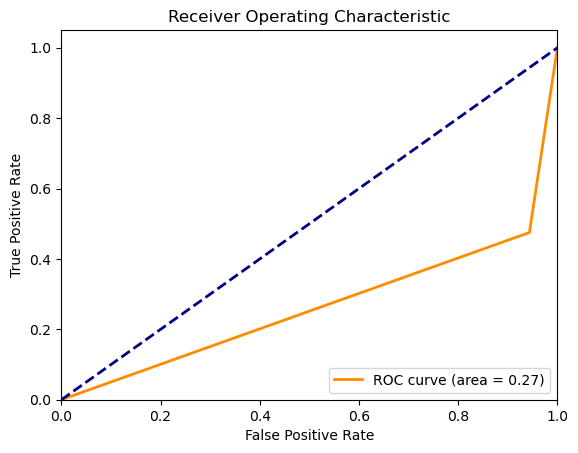

In [41]:
class_names = ['1','2']
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200, 300]  # Number of iterations
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Using the best model from Grid Search
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
# Accuracy score
rfc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", rfc_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve with pos_label set to 1 (since 1 means liver disease)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [42]:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy of the best model: {train_accuracy}')


Training Accuracy of the best model: 0.7411971830985915


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.7254098360655737
Classification Report:
              precision    recall  f1-score   support

           1     0.7912    0.6000    0.6825       120
           2     0.6863    0.8468    0.7581       124

    accuracy                         0.7254       244
   macro avg     0.7387    0.7234    0.7203       244
weighted avg     0.7379    0.7254    0.7209       244



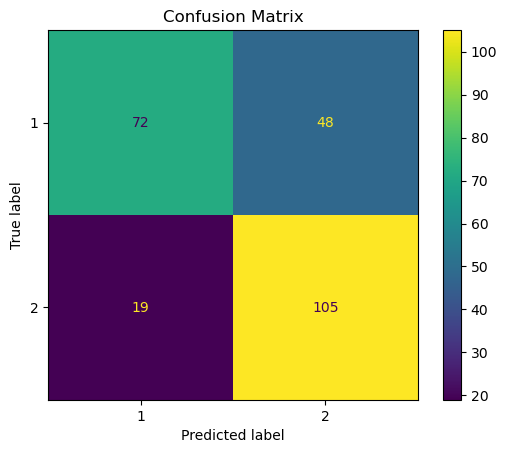

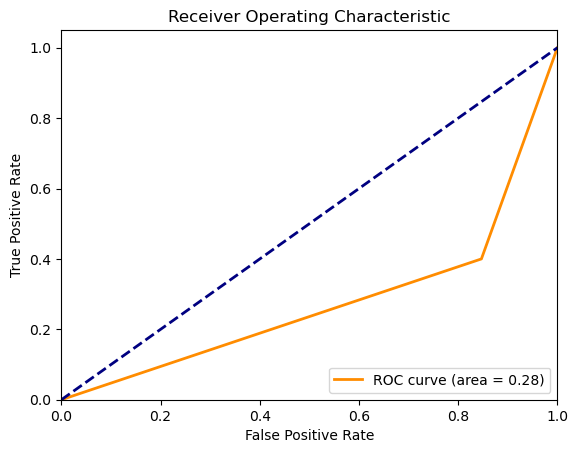

In [43]:
dtc = DecisionTreeClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 5),
    'min_samples_leaf': range(1, 10, 4),
    'min_samples_split': range(2, 10, 4),
}
# Perform grid search
grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Get the best model from grid search
best_dtc = grid_search_dt.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_dt.best_params_)

# Fit the best model to the data
best_dtc.fit(X_train, y_train)

# Make predictions
y_pred = best_dtc.predict(X_test)

# Accuracy score
dtc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", dtc_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve with pos_label set to 1 (since 1 means liver disease)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [44]:
y_train_pred = best_dtc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy of the best model: {train_accuracy}')


Training Accuracy of the best model: 0.8679577464788732


Accuracy: 0.7336065573770492
Classification Report:
              precision    recall  f1-score   support

           1     0.8667    0.5417    0.6667       120
           2     0.6746    0.9194    0.7782       124

    accuracy                         0.7336       244
   macro avg     0.7706    0.7305    0.7224       244
weighted avg     0.7690    0.7336    0.7233       244



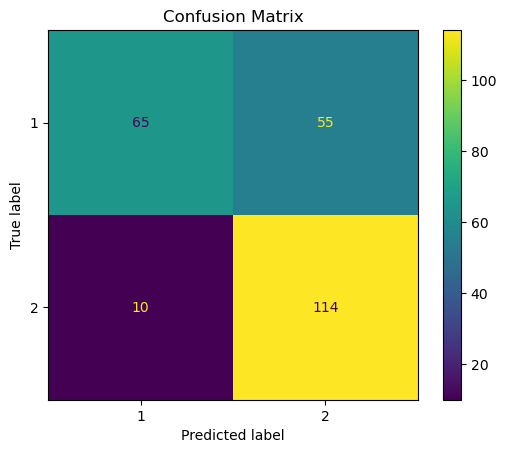

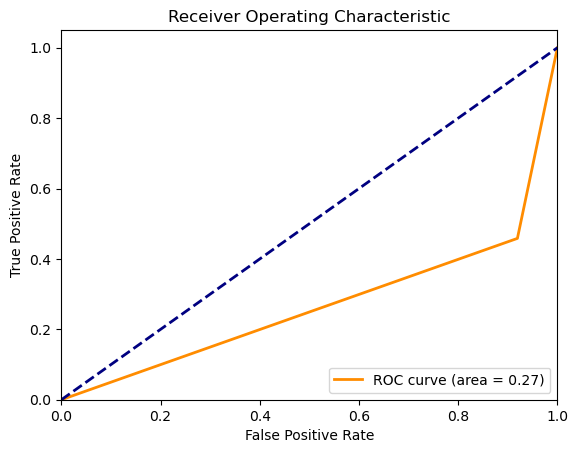

In [45]:
# Define the Support Vector Classifier model
svc = SVC(probability=True)  # Set probability to True for ROC curve

# Define hyperparameter grid for grid search
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

# Perform grid search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_svc = grid_search.best_estimator_

# Fit the best model to the data
best_svc.fit(X_train, y_train)

# Make predictions
y_pred = best_svc.predict(X_test)

# Accuracy score
svc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svc_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()
# Calculate ROC curve with pos_label set to 1 (since 1 means liver disease)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [46]:
y_train_pred = best_svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy of the best model: {train_accuracy}')


Training Accuracy of the best model: 0.7429577464788732


Accuracy: 0.7213114754098361
Classification Report:
              precision    recall  f1-score   support

           1     0.8714    0.5083    0.6421       120
           2     0.6609    0.9274    0.7718       124

    accuracy                         0.7213       244
   macro avg     0.7662    0.7179    0.7070       244
weighted avg     0.7644    0.7213    0.7080       244



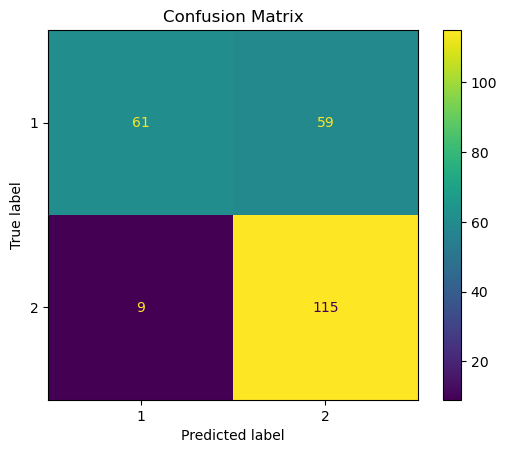

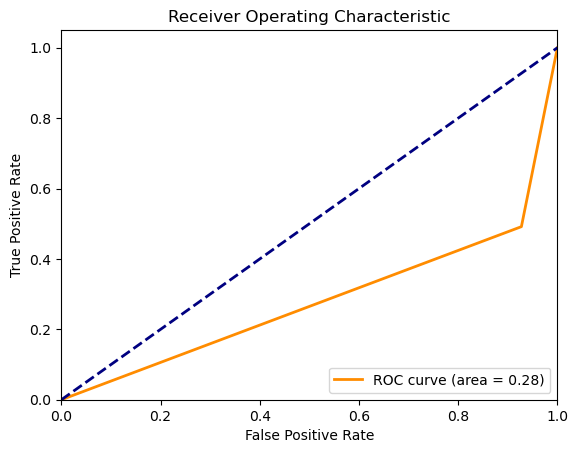

In [47]:
# Define the Stochastic Gradient Descent model
sgd = SGDClassifier()

# Define hyperparameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001,0.01, 0.1],
}

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_sgd = grid_search.best_estimator_

# Fit the best model to the data
best_sgd.fit(X_train, y_train)

# Make predictions
y_pred = best_sgd.predict(X_test)

# Accuracy score
sgd_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", sgd_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve with pos_label set to 1 (since 1 means liver disease)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

In [48]:
y_train_pred = best_sgd.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy of the best model: {train_accuracy}')


Training Accuracy of the best model: 0.7306338028169014


In [50]:
# Assuming best_model is your LogisticRegression model, use the model's accuracy score instead
best_model_acc = accuracy_score(y_test, best_model.predict(X_test))

# Create the DataFrame with the model scores
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'SGD Classifier', 'Decision Tree Classifier'],
    'Score': [best_model_acc,  svc_acc, sgd_acc, dtc_acc]
})

# Sort the models by score
models_sorted = models.sort_values(by='Score', ascending=False)
print(models_sorted)


                      Model     Score
0       Logistic Regression  0.737705
1                       SVC  0.733607
3  Decision Tree Classifier  0.725410
2            SGD Classifier  0.721311
